In [1]:
import pandas as pd
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 20000)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Data observation

We start by taking a look at the data.

Let us import the data

In [2]:
df_full=pd.read_csv('kag_risk_factors_cervical_cancer.csv')
df_full.shape

(858, 36)

In [3]:
df_full

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


The output variable is Biopsy. 0 indicates that the patient does not have cancer while 1 indicates that she does have cancer.

In [4]:
df_full['Biopsy']

0      0
1      0
2      0
3      0
4      0
5      0
6      1
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     1
42     0
43     0
44     1
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     1
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     1
94     0
95     0
96     1
97     0
98     0
99     0
100    0
101    0
102    0
103    1
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

I see that there are multiple entries that are '?'. I suppose these are missing values. Let us replace '?' with NaN and turn the object type to numeric type.

In [6]:
df_fullna = df_full.replace('?', np.nan)

Below is the count of NaNs in different columns

In [7]:
df_fullna.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

## 2. Data Preprocessing

In [8]:
df=df_fullna

In [9]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'], dtype='object')

In [10]:
df = df.apply(pd.to_numeric, axis=0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

It seems like the columns indicating when the first diagnosis and last diagnosis of STDs has very few entries. To simplify our analysis, I'll remove those columns.

Now we have to fill the NaN values. 

For continuous variables we can either replace the NaN values with the mean or the median. But first, let us look at the range of values to see if there are outliers. If there are outliers (extreme values), it would be better to replace the missing values by the median. If not, we can replace the missing values by the mean.

In [12]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,741.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,858.000000,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,0.514804,0.104914,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.087413,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,1.943089,0.306646,0.561993,0.234716,0.0,0.072739,0.232197,0.152853,0.036442,0.036442,0.036442,0.0,0.152853,0.036442,0.051503,0.302545,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df=df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'],axis=1)

In [14]:
cols=list(df.columns)
mediancolumns= ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
          'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)','STDs (number)', 
          'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
          'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis','STDs:pelvic inflammatory disease',
          'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 
          'STDs:HPV']
for i,colm in enumerate(mediancolumns):
    df[colm]=df[colm].fillna(df[colm].median())
    
categoricalcolumns=['Smokes','Hormonal Contraceptives','IUD','IUD (years)','STDs']
for i, colm in enumerate(categoricalcolumns):
    df[colm]=df[colm].fillna(1)
    
# for categorical variable I need to understand what this does!
df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])


In [15]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
Biopsy                                0
Smokes_0.0                            0
Smokes_1.0                            0


In [109]:
df_data['Biopsy'].sum()

55

In [16]:
df_data=df # Saving data

Let's check the value ranges before we do regression

In [17]:
df.describe(include='all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Biopsy,Smokes_0.0,Smokes_1.0,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,IUD_0.0,IUD_1.0,STDs_0.0,STDs_1.0,Dx:Cancer_0,Dx:Cancer_1,Dx:CIN_0,Dx:CIN_1,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.201241,0.446278,2.035331,0.580967,0.155012,0.051282,0.0,0.004662,0.050117,0.020979,0.001166,0.001166,0.001166,0.0,0.020979,0.001166,0.002331,0.087413,0.064103,0.841492,0.158508,0.313520,0.686480,0.766900,0.233100,0.785548,0.214452,0.979021,0.020979,0.989510,0.010490,0.979021,0.020979,0.972028,0.027972,0.959207,0.040793,0.948718,0.051282,0.913753,0.086247
std,8.497948,1.644759,2.791883,1.400981,4.060623,2.210351,3.567040,1.813256,0.529617,0.220701,0.0,0.068159,0.218313,0.143398,0.034139,0.034139,0.034139,0.0,0.143398,0.034139,0.048252,0.302545,0.245078,0.365430,0.365430,0.464194,0.464194,0.423052,0.423052,0.410681,0.410681,0.143398,0.143398,0.101939,0.101939,0.143398,0.143398,0.164989,0.164989,0.197925,0.197925,0.220701,0.220701,0.280892,0.280892
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

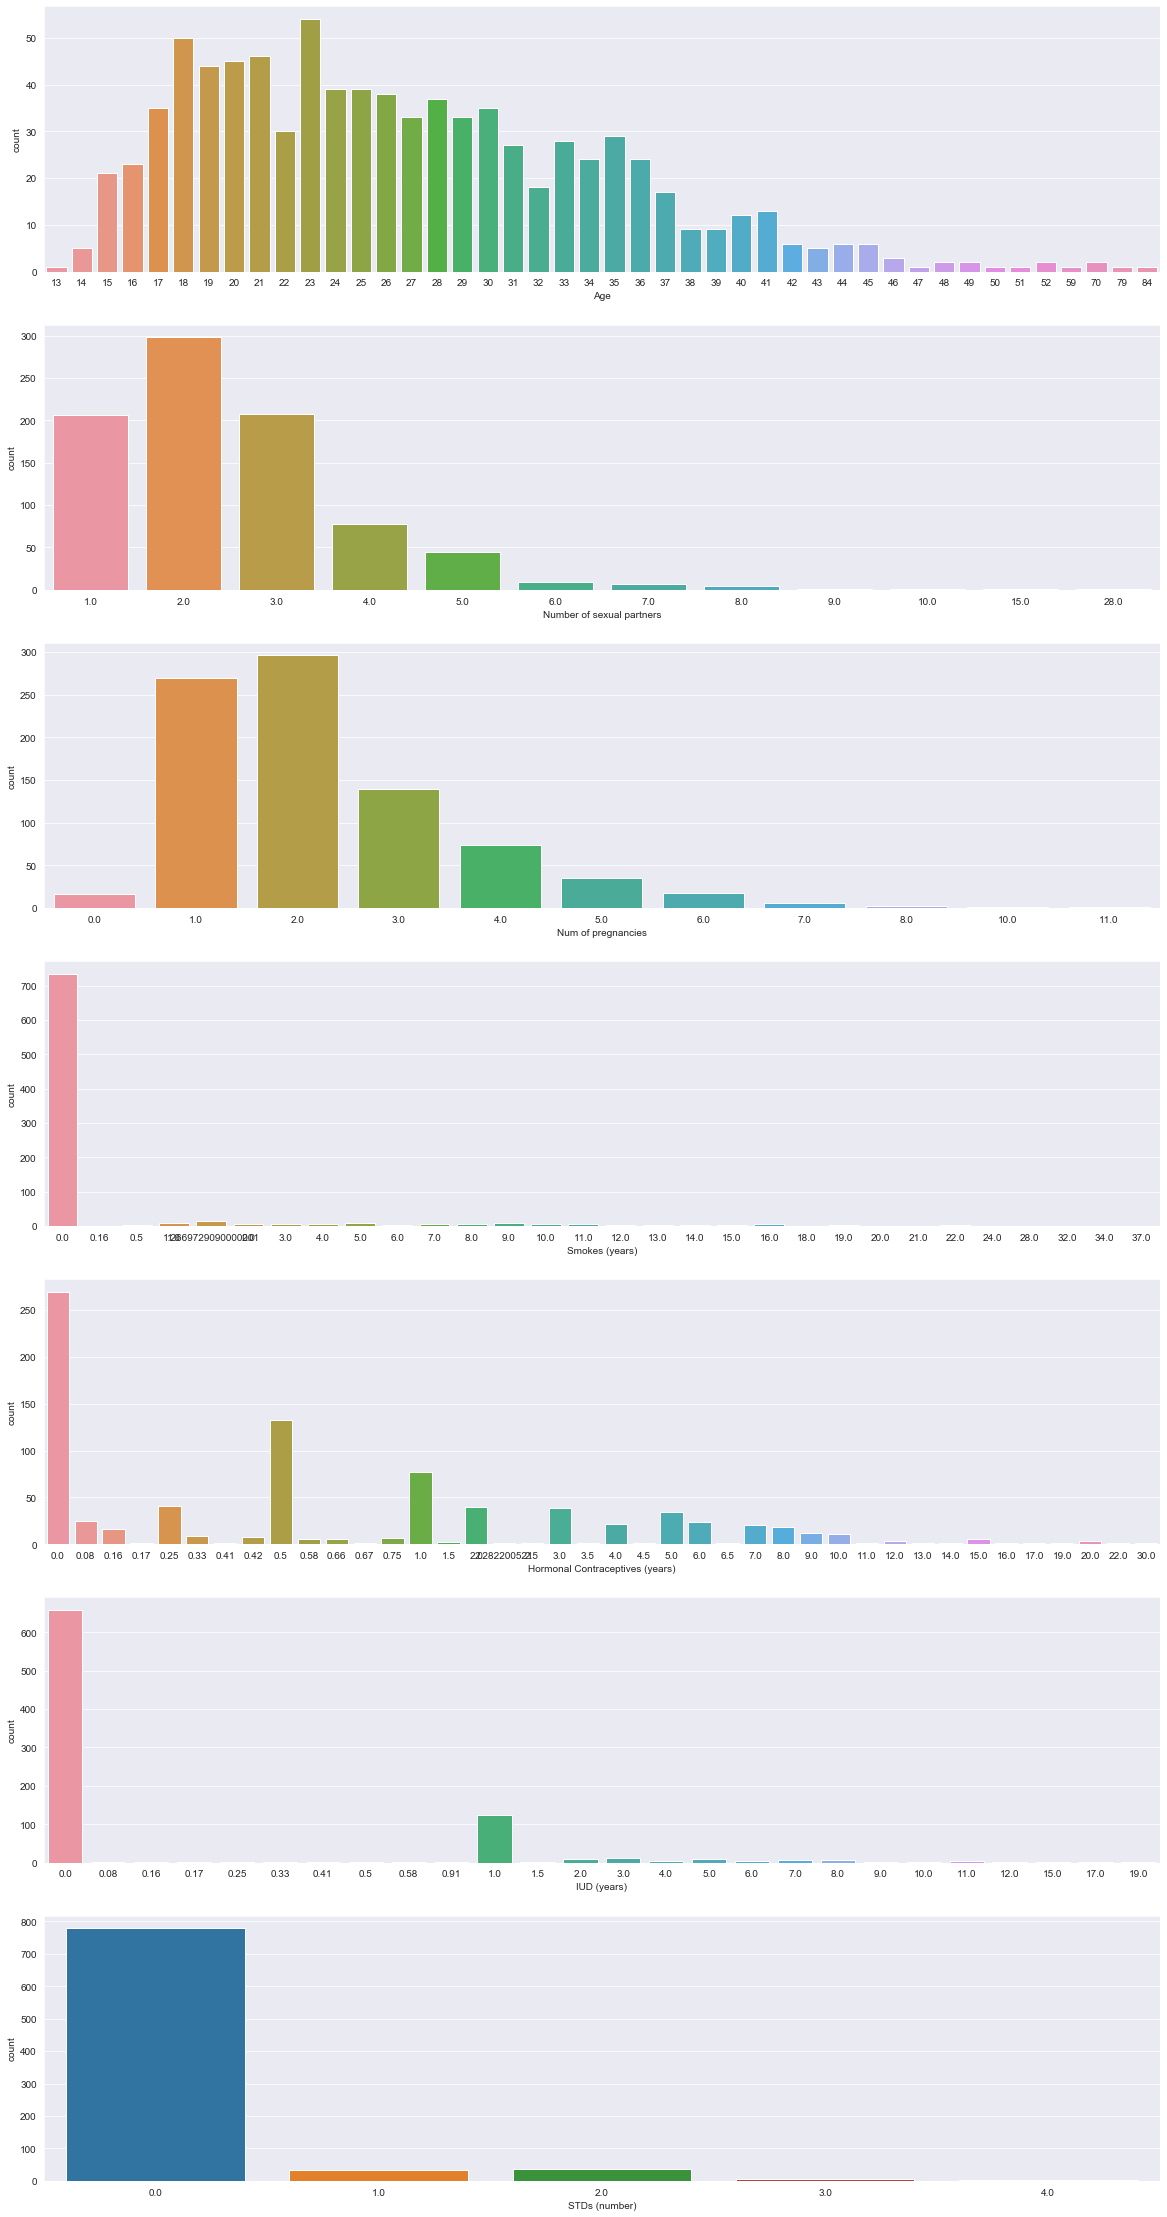

In [18]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=df, ax=ax3)
sns.countplot(x='Smokes (years)', data=df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=df, ax=ax5)
sns.countplot(x='IUD (years)', data=df, ax=ax6)
sns.countplot(x='STDs (number)', data=df, ax=ax7)

## Understanding the data

#### Age

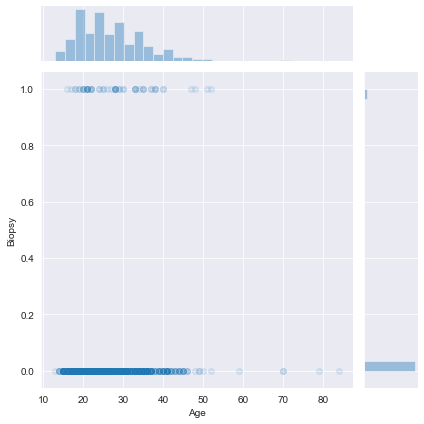

In [113]:
sns.jointplot(x='Age', y='Biopsy', data=df, alpha=0.1) #Alpha let's you see the points

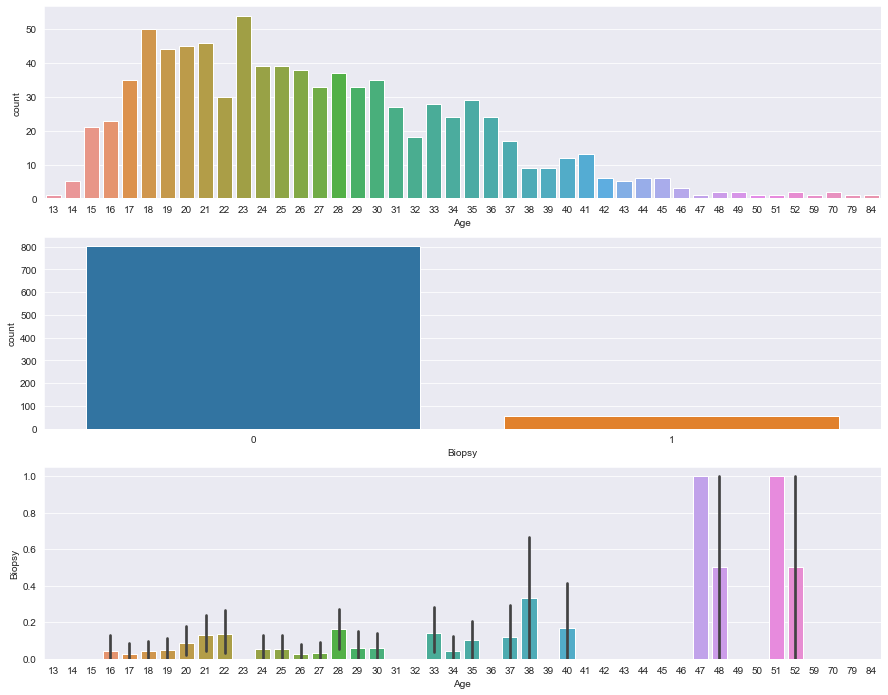

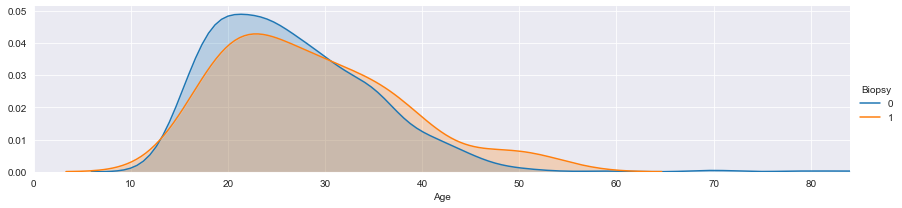

In [114]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,12))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Biopsy', data=df, ax=ax2)
sns.barplot(x='Age', y='Biopsy', data=df, ax=ax3)

#Stratified
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

These plots indicate that the percentage of patients from the data that have been diagnosed to have cervical cancer is very low, namely 6.41%. Therefore we expect that our model will not have a very high sensitivity.
Also, we don't have many data points at older ages. This may affect the model in some way.

#### Number of sexual partners 

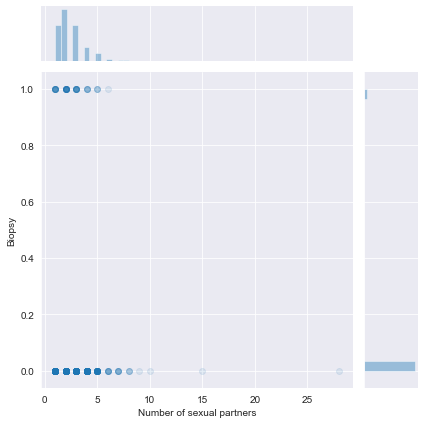

In [116]:
sns.jointplot(x='Number of sexual partners', y='Biopsy', data=df, alpha=0.1) 

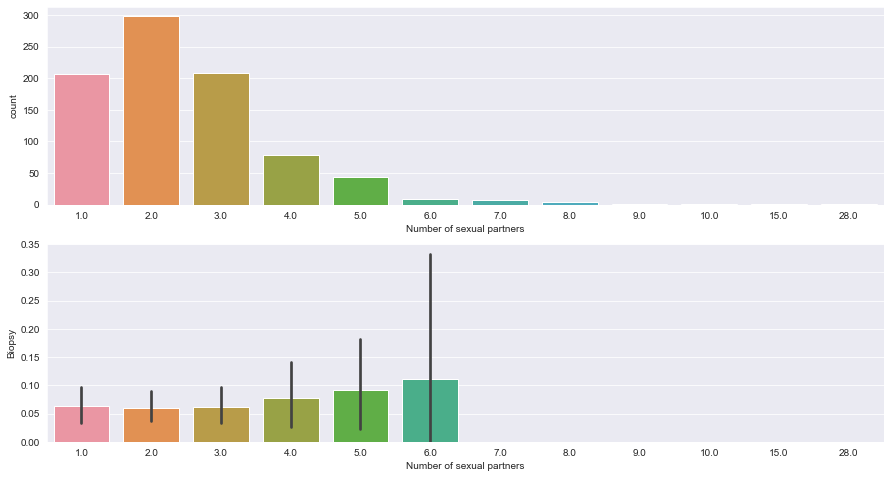

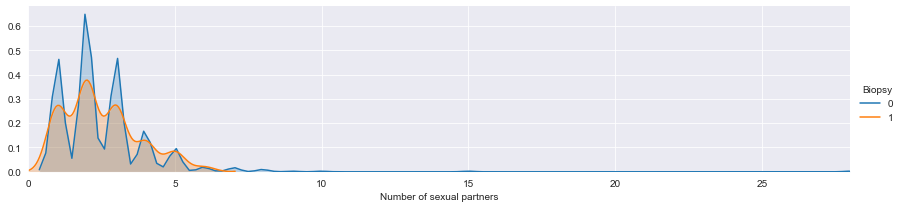

In [117]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
sns.countplot(x='Number of sexual partners', data=df, ax=ax1)
sns.barplot(x='Number of sexual partners', y='Biopsy', data=df, ax=ax2) #categorical to categorical

#continuous to categorical
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Number of sexual partners',shade= True)
facet.set(xlim=(0, df['Number of sexual partners'].max()))
facet.add_legend()

#### Number of pregnancies

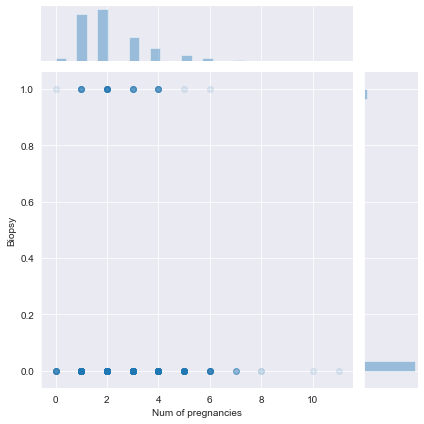

In [118]:
sns.jointplot(x='Num of pregnancies', y='Biopsy', data=df, alpha=0.1) 

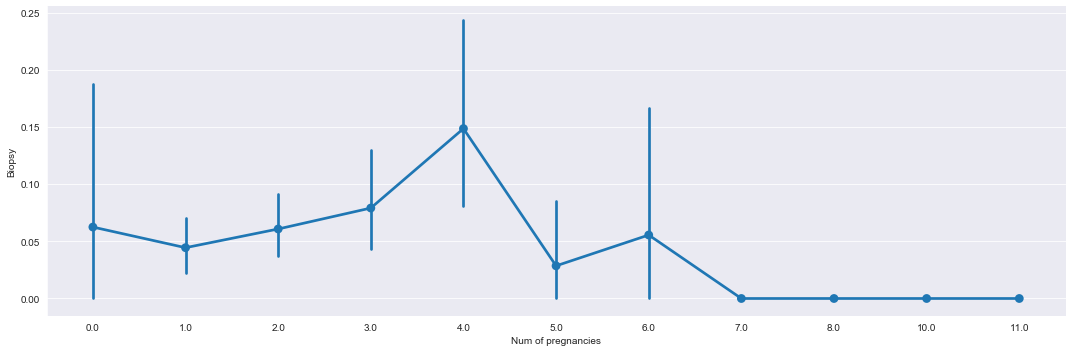

In [119]:
sns.factorplot('Num of pregnancies','Biopsy',data=df, size=5, aspect=3)

There seems to be a trend here. More children - higher probability of cervical cancer. The values above 4 children probably don't indicate very well the population because the number of people with more than 4 children is very less and so not representative of the whole population who has 4+ children

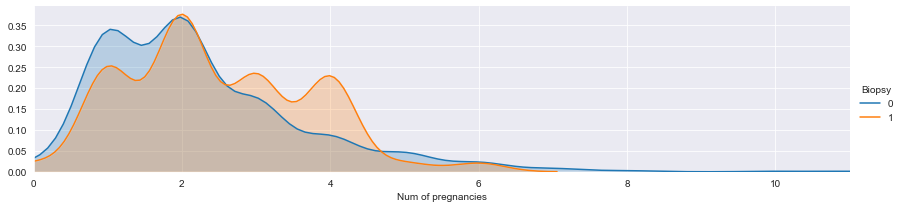

In [120]:
#continuous to categorical
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies',shade= True)
facet.set(xlim=(0, df['Num of pregnancies'].max()))
facet.add_legend()

#### Correlation contour

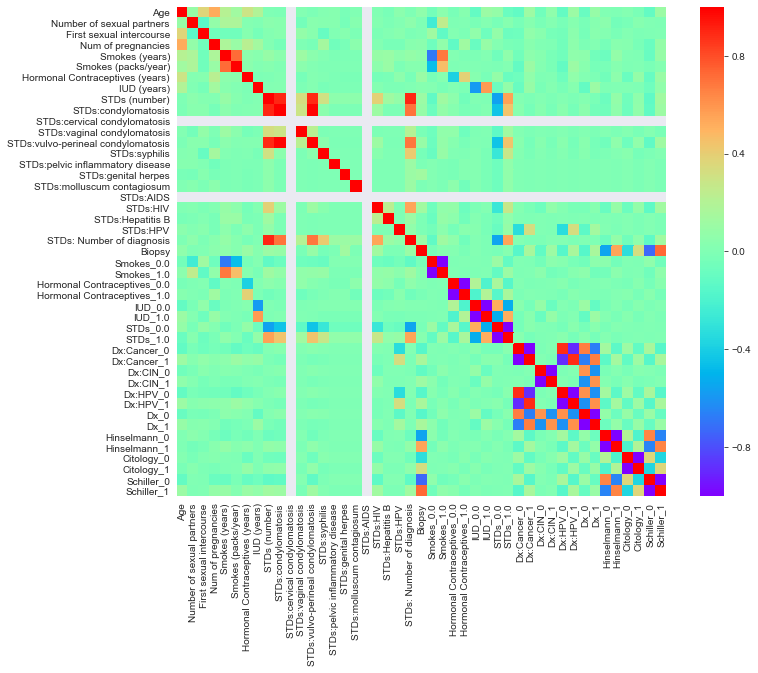

In [121]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap='rainbow')

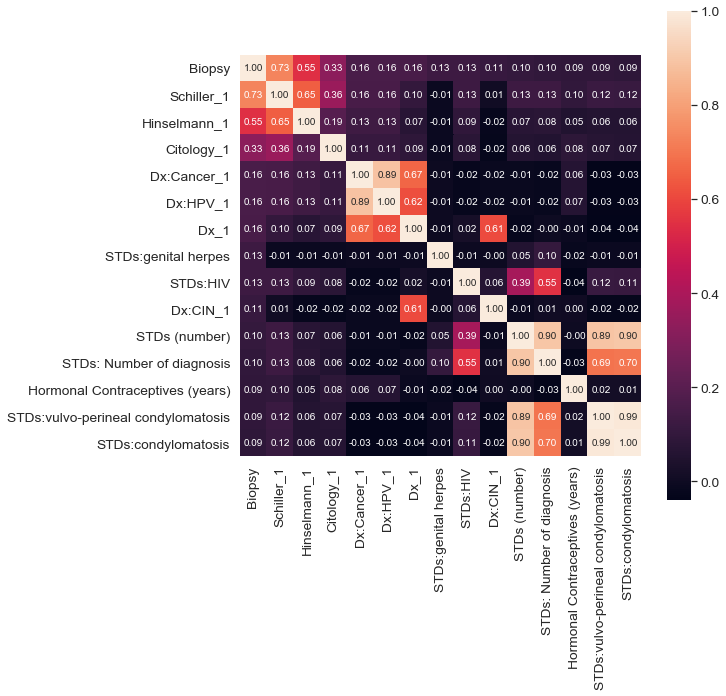

In [123]:
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(9,9)) 

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()


### Data - Training + Test split

Shuffle the data and split them into training and testing set

In [91]:
np.random.seed(24)
df_data_shuffle = df_data.iloc[np.random.permutation(len(df_data))]

df_train = df_data_shuffle.iloc[1:686, :] #80 percent of the data
df_test = df_data_shuffle.iloc[686: , :]

In [92]:
df_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Biopsy,Smokes_0.0,Smokes_1.0,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,IUD_0.0,IUD_1.0,STDs_0.0,STDs_1.0,Dx:Cancer_0,Dx:Cancer_1,Dx:CIN_0,Dx:CIN_1,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
93,33,1.0,29.0,2.0,0.000000,0.000000,0.500000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
187,28,3.0,16.0,3.0,12.000000,6.000000,7.000000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
268,23,2.0,17.0,3.0,0.000000,0.000000,3.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
71,34,2.0,17.0,3.0,0.000000,0.000000,0.500000,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
557,27,2.0,17.0,3.0,0.000000,0.000000,0.250000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
436,16,3.0,14.0,1.0,0.000000,0.000000,0.500000,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0
758,30,4.0,19.0,1.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
132,30,2.0,22.0,2.0,0.000000,0.000000,0.080000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
398,18,2.0,16.0,2.0,0.000000,0.000000,0.500000,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
393,19,3.0,15.0,1.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


## Defining features and labels

In [93]:
features=['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']
len(features)

44

In [94]:
df_train.shape

(685, 45)

In [95]:
df_train_feature = df_train[features]
train_label = np.array(df_train['Biopsy'])
df_test_feature=df_test[features]
test_label=np.array(df_test['Biopsy'])

## Data normalization

In [96]:
#Normalization
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_feature = minmax_scale.fit_transform(df_train_feature)
test_feature = minmax_scale.fit_transform(df_test_feature)

In [97]:
#Make sure if it's the shape what we want! And it is.
print(train_feature[0])
print(train_label[0])
print(test_feature[0])
print(test_label[0])

[0.3030303  0.         0.86363636 0.2        0.         0.
 0.01666667 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         1.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         0.         1.
 0.         1.        ]
1
[0.20289855 0.14285714 0.16666667 0.18181818 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         0.
 1.         0.        ]
0


In [98]:
train_feature.shape

(685, 44)

## 3. (Keras) Model designing/training/visualization

### A very simple, quick and effective Multi-Layered-Percepteron approach to solve binary classification problems

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 200)               9000      
_________________________________________________________________
dropout_58 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_59 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 201       
Total params: 49,401
Trainable params: 49,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 548 samples, validate on 137 samples
Epoch 1/30
 - 2s - loss: 0.6793 - acc: 0.8303 - val_loss: 0.6510 - val_acc: 0.9051
Epoc

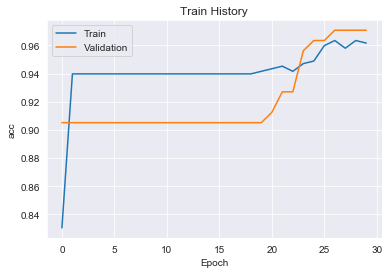

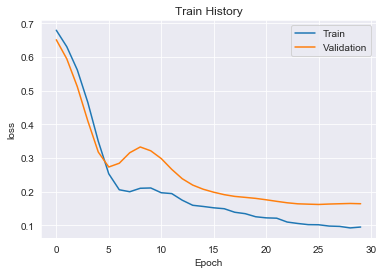

In [99]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
######################### Model designing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential() 

#Dropout is a regularization technique for neural network models - randomly
# selected neurons are dropped out during training. Since these are dropped out at random
# the network has to 'learn' in multiple independent internal representations.
# The effect is that the network becomes less sensitive to the specific weight of neurons.
# This results in a network that is less likely to overfit the training data.


#Input layer
model.add(Dense(units=200, 
                input_dim=44, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#Hidden layer 1
model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#Hidden layer 2
#model.add(Dense(units=300,  
#                kernel_initializer='uniform', 
#                activation='relu'))
#model.add(Dropout(0.5))


#Output layer
model.add(Dense(units=1,
                kernel_initializer='uniform', 
                activation='sigmoid'))

print(model.summary()) #for showing the structure and parameters

# Defining how to measure performance
model.compile(loss='binary_crossentropy',   
              optimizer='adam', metrics=['accuracy'])

# Train the model
# Verbose=2, showing loss and accuracy change timely
train_history = model.fit(x=train_feature, y=train_label,  
                          validation_split=0.2, epochs=30, 
                          batch_size=200, verbose=2) 
print(train_history)
#visualize the loss and accuracy after each epoch
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

#For saving weights
#model.save_weights("Savemodels/Cervical_ca(Kaggles)_MLP.h5")
#print('model saved to disk')

Note that when the number of epochs is larger, the accuracy of the training set diverges from that of the validation set. This indicates overfitting.

When I reduce the batch size, the deviation seems to happen at a later epoch. 

When I increase the number of layers, the validation accuracy seems to be a constant. What does this mean? As I reduce it, the validation accuracy seems to converge onto the accuracy of the training set.

The best results in terms of the convergence of training and validation accuracy and loss seems to happen at 1 hidden layer and 30 epochs with 200 units in each layer.

I would later like to test the effect of changing number of layers, layer size, batch size and dropout rate on the training model.

## Model prediction accuracy

### In test data

In [100]:
scores = model.evaluate(test_feature, test_label)
print('\n')
print('accuracy=',scores[1])

172/172 [==============================] - 0s 81us/step


accuracy= 0.9651162790697675


In [101]:
prediction = model.predict_classes(test_feature)

In [102]:
# Create a dataframe for prediction and correct answer
df_ans = pd.DataFrame({'Biopsy' :test_label})
df_ans['Prediction'] = prediction

In [103]:
df_ans[ df_ans['Biopsy'] != df_ans['Prediction'] ]

,Biopsy,Prediction
18,1,0
22,1,0
34,0,1
59,1,0
105,0,1
141,0,1


In [104]:
df_ans['Prediction'].value_counts()

0    164
1      8
Name: Prediction, dtype: int64

In [106]:
df_ans['Biopsy'].value_counts()

0    164
1      8
Name: Biopsy, dtype: int64

### Confusion Matrix

Make confusion matrix to evaluate the performance of the prediction model.

total test case number:  172


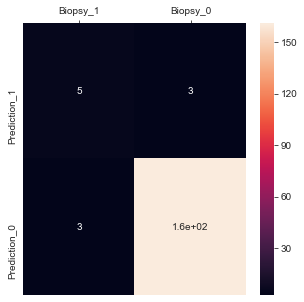

In [107]:
cols = ['Biopsy_1','Biopsy_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1 = len(df_ans[(df_ans['Prediction'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
B1P0 = len(df_ans[(df_ans['Prediction'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
B0P1 = len(df_ans[(df_ans['Prediction'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])
B0P0 = len(df_ans[(df_ans['Prediction'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])

conf = np.array([[B1P1,B0P1],[B1P0,B0P0]])
df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cm, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(conf))

Let us now calculate the sensitivity, specificity, false positive rate and false negative rate

In [108]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

total_num:  172
G1P1:  5
G0P1:  3
G1P0:  3
G0P0:  161
##########################
sensitivity:  0.625
specificity:  0.9817073170731707
false_positive_rate:  0.018292682926829267
false_negative_rate:  0.375


(172, 0.625, 0.9817073170731707, 0.018292682926829267, 0.375)

The specificity is high indicating that the model has learned very well to predict that a patient does not have cervical cancer. However the sensitivity is rather low. This is a result of the lack of data with positive rates of biopsies. The model didn't have enough data points with positive outcomes of biopsies (indicating that the patient does have cancer) in order to learn to predict this outcome. This is expected from any set of data because it is more likely to get a data set with larger numbers of negative outcomes than otherwise.

## 4. Naive Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(df_train_feature, train_label)
predictionbayes=nb.predict(df_test_feature)
scores = nb.score(df_test_feature, test_label)
print('accuracy=',scores)

accuracy= 0.877906976744186


In [143]:
df_ansbayes = pd.DataFrame({'Biopsy' :test_label})
df_ansbayes['Prediction'] = predictionbayes
df_ansbayes[ df_ansbayes['Biopsy'] != df_ansbayes['Prediction'] ]

,Biopsy,Prediction
13,0,1
34,0,1
38,0,1
42,0,1
44,0,1
49,0,1
54,0,1
56,0,1
60,0,1
71,0,1


total test case number:  172


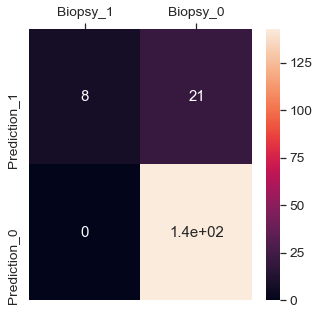

In [132]:
cols = ['Biopsy_1','Biopsy_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1bayes = len(df_ansbayes[(df_ansbayes['Prediction'] == df_ansbayes['Biopsy']) & (df_ansbayes['Biopsy'] == 1)])
B1P0bayes = len(df_ansbayes[(df_ansbayes['Prediction'] != df_ansbayes['Biopsy']) & (df_ansbayes['Biopsy'] == 1)])
B0P1bayes = len(df_ansbayes[(df_ansbayes['Prediction'] != df_ansbayes['Biopsy']) & (df_ansbayes['Biopsy'] == 0)])
B0P0bayes = len(df_ansbayes[(df_ansbayes['Prediction'] == df_ansbayes['Biopsy']) & (df_ansbayes['Biopsy'] == 0)])

confbayes = np.array([[B1P1bayes,B0P1bayes],[B1P0bayes,B0P0bayes]])
df_cmbayes = pd.DataFrame(confbayes, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cmbayes, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(confbayes))

In [133]:
model_efficacy(confbayes)

total_num:  172
G1P1:  8
G0P1:  21
G1P0:  0
G0P0:  143
##########################
sensitivity:  1.0
specificity:  1.0
false_positive_rate:  0.12804878048780488
false_negative_rate:  0.0


(172, 1.0, 1.0, 0.12804878048780488, 0.0)

This seems to be a much better model than the Multi-layered-Percepteron model because the specificity and sensitivity are 1. When it comes to a risk classification, we want to minimize the false negative rate even if that means we have a high false positive rate. This way, we indicate to patients who don't necessarily have cancer to get it checked, while not making a mistake on the prediction of those who have cancer but go undetected by the model.

## 5. K-Nearest Neighbours

In [169]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(df_train_feature, train_label)
predictionknn=knn.predict(df_test_feature)
scores = knn.score(df_test_feature, test_label)
print('accuracy=',scores)

accuracy= 0.9418604651162791


In [170]:
df_ansknn = pd.DataFrame({'Biopsy' :test_label})
df_ansknn['Prediction'] = predictionknn
df_ansknn[ df_ansknn['Biopsy'] != df_ansknn['Prediction'] ]

,Biopsy,Prediction
16,1,0
18,1,0
20,1,0
22,1,0
32,1,0
59,1,0
93,1,0
118,0,1
156,1,0
162,0,1


total test case number:  172


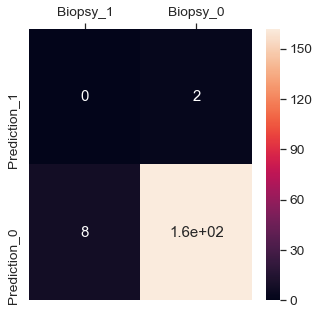

In [171]:
cols = ['Biopsy_1','Biopsy_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1knn = len(df_ansknn[(df_ansknn['Prediction'] == df_ansknn['Biopsy']) & (df_ansknn['Biopsy'] == 1)])
B1P0knn = len(df_ansknn[(df_ansknn['Prediction'] != df_ansknn['Biopsy']) & (df_ansknn['Biopsy'] == 1)])
B0P1knn = len(df_ansknn[(df_ansknn['Prediction'] != df_ansknn['Biopsy']) & (df_ansknn['Biopsy'] == 0)])
B0P0knn = len(df_ansknn[(df_ansknn['Prediction'] == df_ansknn['Biopsy']) & (df_ansknn['Biopsy'] == 0)])

confknn = np.array([[B1P1knn,B0P1knn],[B1P0knn,B0P0knn]])
df_cmknn = pd.DataFrame(confknn, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cmknn, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(confknn))

In [172]:
model_efficacy(confknn)

total_num:  172
G1P1:  0
G0P1:  2
G1P0:  8
G0P0:  162
##########################
sensitivity:  0.0
specificity:  0.9529411764705882
false_positive_rate:  0.012195121951219513
false_negative_rate:  1.0


(172, 0.0, 0.9529411764705882, 0.012195121951219513, 1.0)

I tried changing k to different values to see if there was any effect in improving the True positive and decrease the False negative rate but that didn't change either of these - it only changed the False positive rate which isn't something we are worried about in this particular example.

## 6. Decision Tree

In [185]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=25, random_state=101,
                            max_features = None, min_samples_leaf = 10)
dtree.fit(df_train_feature, train_label)
predictiondtree=dtree.predict(df_test_feature)
scores = dtree.score(df_test_feature, test_label)
print('accuracy=',scores)

accuracy= 0.9418604651162791


In [186]:
df_ansdtree = pd.DataFrame({'Biopsy' :test_label})
df_ansdtree['Prediction'] = predictiondtree
df_ansdtree[ df_ansdtree['Biopsy'] != df_ansdtree['Prediction'] ]

,Biopsy,Prediction
13,0,1
18,1,0
32,1,0
34,0,1
49,0,1
56,0,1
59,1,0
93,1,0
105,0,1
161,0,1


total test case number:  172


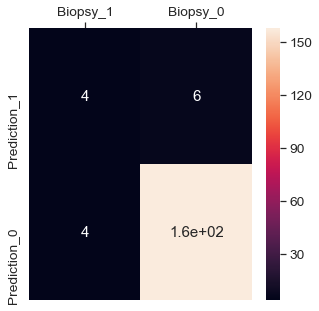

In [187]:
cols = ['Biopsy_1','Biopsy_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1dtree = len(df_ansdtree[(df_ansdtree['Prediction'] == df_ansdtree['Biopsy']) & (df_ansdtree['Biopsy'] == 1)])
B1P0dtree = len(df_ansdtree[(df_ansdtree['Prediction'] != df_ansdtree['Biopsy']) & (df_ansdtree['Biopsy'] == 1)])
B0P1dtree = len(df_ansdtree[(df_ansdtree['Prediction'] != df_ansdtree['Biopsy']) & (df_ansdtree['Biopsy'] == 0)])
B0P0dtree = len(df_ansdtree[(df_ansdtree['Prediction'] == df_ansdtree['Biopsy']) & (df_ansdtree['Biopsy'] == 0)])

confdtree = np.array([[B1P1dtree,B0P1dtree],[B1P0dtree,B0P0dtree]])
df_cmdtree = pd.DataFrame(confdtree, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cmdtree, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(confdtree))

In [188]:
model_efficacy(confdtree)

total_num:  172
G1P1:  4
G0P1:  6
G1P0:  4
G0P0:  158
##########################
sensitivity:  0.5
specificity:  0.9753086419753086
false_positive_rate:  0.036585365853658534
false_negative_rate:  0.5


(172, 0.5, 0.9753086419753086, 0.036585365853658534, 0.5)

## 7. Random Forest

In [192]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1,
                          random_state=101, max_features=None,
                          min_samples_leaf=30)
rfm.fit(df_train_feature,train_label)
predictionrfm=rfm.predict(df_test_feature)
scores = rfm.score(df_test_feature, test_label)
print('accuracy=',scores)

accuracy= 0.9534883720930233


In [193]:
df_ansrfm = pd.DataFrame({'Biopsy' :test_label})
df_ansrfm['Prediction'] = predictionrfm
df_ansrfm[ df_ansrfm['Biopsy'] != df_ansrfm['Prediction'] ]

,Biopsy,Prediction
13,0,1
34,0,1
49,0,1
56,0,1
59,1,0
105,0,1
141,0,1
161,0,1


total test case number:  172


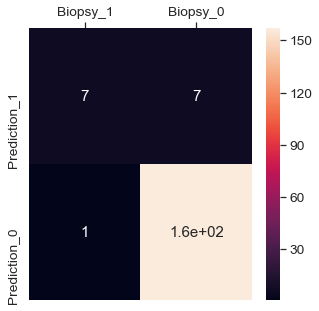

In [195]:
cols = ['Biopsy_1','Biopsy_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1rfm = len(df_ansrfm[(df_ansrfm['Prediction'] == df_ansrfm['Biopsy']) & (df_ansrfm['Biopsy'] == 1)])
B1P0rfm = len(df_ansrfm[(df_ansrfm['Prediction'] != df_ansrfm['Biopsy']) & (df_ansrfm['Biopsy'] == 1)])
B0P1rfm = len(df_ansrfm[(df_ansrfm['Prediction'] != df_ansrfm['Biopsy']) & (df_ansrfm['Biopsy'] == 0)])
B0P0rfm = len(df_ansrfm[(df_ansrfm['Prediction'] == df_ansrfm['Biopsy']) & (df_ansrfm['Biopsy'] == 0)])

confrfm = np.array([[B1P1rfm,B0P1rfm],[B1P0rfm,B0P0rfm]])
df_cmrfm = pd.DataFrame(confrfm, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cmrfm, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(confrfm))

In [196]:
model_efficacy(confrfm)

total_num:  172
G1P1:  7
G0P1:  7
G1P0:  1
G0P0:  157
##########################
sensitivity:  0.875
specificity:  0.9936708860759493
false_positive_rate:  0.042682926829268296
false_negative_rate:  0.125


(172, 0.875, 0.9936708860759493, 0.042682926829268296, 0.125)

## 8. Support Vector Machine

In [206]:
from sklearn.svm import SVC
svm=SVC(kernel="linear", C=0.25, random_state=101)
svm.fit(df_train_feature,train_label)
predictionsvm=svm.predict(df_test_feature)
scores = svm.score(df_test_feature, test_label)
print('accuracy=',scores)

accuracy= 0.9476744186046512


In [207]:
df_anssvm = pd.DataFrame({'Biopsy' :test_label})
df_anssvm['Prediction'] = predictionsvm
df_anssvm[ df_anssvm['Biopsy'] != df_anssvm['Prediction'] ]

,Biopsy,Prediction
13,0,1
22,1,0
34,0,1
49,0,1
56,0,1
59,1,0
105,0,1
141,0,1
161,0,1


total test case number:  172


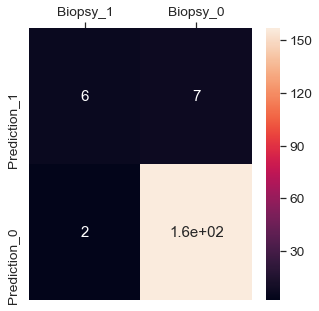

In [208]:
cols = ['Biopsy_1','Biopsy_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1svm = len(df_anssvm[(df_anssvm['Prediction'] == df_anssvm['Biopsy']) & (df_anssvm['Biopsy'] == 1)])
B1P0svm = len(df_anssvm[(df_anssvm['Prediction'] != df_anssvm['Biopsy']) & (df_anssvm['Biopsy'] == 1)])
B0P1svm = len(df_anssvm[(df_anssvm['Prediction'] != df_anssvm['Biopsy']) & (df_anssvm['Biopsy'] == 0)])
B0P0svm = len(df_anssvm[(df_anssvm['Prediction'] == df_anssvm['Biopsy']) & (df_anssvm['Biopsy'] == 0)])

confsvm = np.array([[B1P1svm,B0P1svm],[B1P0svm,B0P0svm]])
df_cmsvm = pd.DataFrame(confsvm, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cmsvm, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(confsvm))

# Conclusion

For the purposes of Cervical Cancer Risk classification for Biopsy, we have tested various classification models with the data obtained from the UCI Repository.

We implemented a Multi-layered-Percepteron model, a Naive Bayes model, a K-Nearest-Neighbor model, a Decision Tree model, a Random Forest model and a Support Vector Machine model.

For the purposes of risk classification, we need our model to successfully predict all the positive cases of cancer correctly while making sure that it doesn't miss out on predicting a positive. That is, we need a model that minimizes the False negatives. We don't care too much about False positives because, it is better to be safe than sorry. This means that the accuracy of the model doesn't really matter as much as minimizing the False negatives.

Considering these conditions, we see that the best model is the Naive Bayes model! This is one of the simplest algorithms, yet this works best in our case. In this model, independence of variables is assumed. We saw in our correlation plot that the features indeed were relatively uncorrelated and so independent. So it is reasonable to expect the Naive Bayes model to work well. However, it is unclear to me why it worked best in minimizing False negatives. This model had the worst accuracy of all the models ~87%

The model with the best accuracy was from the MLP model ~ 97%. However, this model didn't do well with respect to minimizing false negatives.


There are certainly more things that can be done with this data set which I plan to do at a later stage - understand why the Naive Bayes model works the best at our task for instance.